# Factorial Generation with Bit Splitting & Prime Swings
Factorials are defined as the product of an integer and all the natural numbers below it. Mathematically speaking -

$$n! = \displaystyle \prod_{i=1}^{n} i$$

This notebook attempts to implement a couple of ways to implement an optimal factorial algorithm, even utilizing and digging into the Python standard library's `math` module. 

In [1]:
import math
import time
import typing

In [2]:
try:
    import matplotlib.pyplot as plt
    from nose.tools import assert_equal
except ImportError:
    %pip install nose matplotlib
    import matplotlib.pyplot as plt
    from nose.tools import assert_equal

## A Simple Implementation
Factorials are easily computable if the number is small. A fairly straightforward & _iterative_ process is described below but we'll soon see, it's not the most optimal solution.

In [3]:
def naive_factorial(n: int) -> int:
    if n <= 0:
        return 1
    mul = 1
    for num in range(1, n+1):
        mul *= num
    return mul

## Visual Analysis
Factorials grow enourmously large as numbers increase. For instance, $5! = 120$ but $10! = 3628800$. That's a large disparage for two numbers with a difference of 5. To visualize it, we can plot a graph for the factorial function running from 1 to 6 and another one from 7 to 10. You can cleary see how much of a difference just a small step can make.

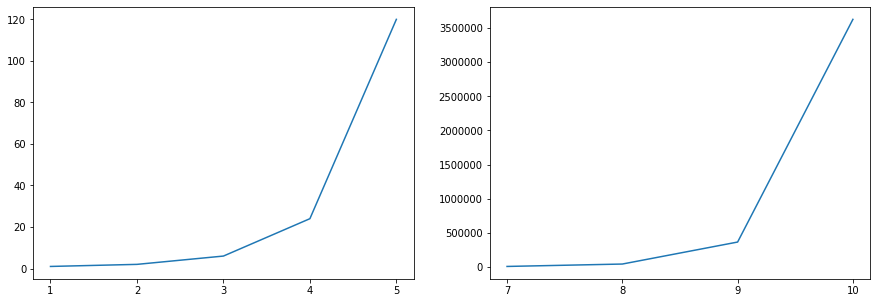

In [4]:
def visualize_growth() -> None:
    x_points_till_6 = tuple(range(1, 6))
    y_points_till_6 = tuple(map(naive_factorial, x_points_till_6))

    x_points_till_11 = tuple(range(7, 11))
    y_points_till_11 = tuple(map(naive_factorial, x_points_till_11))

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    axes[0].plot(x_points_till_6, y_points_till_6)
    axes[0].set_xticks(x_points_till_6)

    axes[1].plot(x_points_till_11, y_points_till_11)
    axes[1].set_xticks(x_points_till_11)

visualize_growth()

In [5]:
# Test cases

# Small numbers.
assert_equal(naive_factorial(2), 2)
assert_equal(naive_factorial(3), 6)

# Decently big numbers.
assert_equal(naive_factorial(10), 3628800)
assert_equal(naive_factorial(12), 479001600)

# Big numbers.
assert_equal(naive_factorial(30), 265252859812191058636308480000000)
assert_equal(naive_factorial(50), 30414093201713378043612608166064768844377641568960512000000000000)

## A Recursive Implementation
Clearly, our implementation is quite simple and works sufficiently well for quite large numbers (mostly due to Python's arbitrary precise integers) but just to know how good we have something, we need to have something bad to compare it to. So let's write a bad factorial function using recursion.
The reason why we can already predict it's going to be slow is due to the fact that every function call needs to have it's own call stack. And so the bigger the number gets, more function stacks will be created. So not the best approach.

In [6]:
def recursive_factorial(n: int) -> int:
    if n < 2:
        return 1
    else:
        return n * recursive_factorial(n-1)

In [7]:
# Test cases for recursive factorial.

# Small numbers.
assert_equal(recursive_factorial(2), 2)
assert_equal(recursive_factorial(3), 6)

# Decently big numbers.
assert_equal(recursive_factorial(10), 3628800)
assert_equal(recursive_factorial(12), 479001600)

# Big numbers.
assert_equal(recursive_factorial(30), 265252859812191058636308480000000)
assert_equal(recursive_factorial(50), 30414093201713378043612608166064768844377641568960512000000000000)

## Time Comparisions
Since Python comes with an inbuilt `factorial` function with the `math` module, we can use it to see how fast our own, custom implementation is as compared to a native C method.
We'll start off by defining a `timeit` function that will take a function `f` that takes no arguments and run it over a fixed number of iterations to see how much time it takes. Read the docstring for more info.

In [8]:
def timeit(f: typing.Callable, iterations: int = 200, args: typing.Tuple = None) -> typing.Dict[str, typing.Any]:
    """
    A generic function to measure the running time of a function
    over a fixed number of iterations. Returns a dictionary
    containing formatted string that includes total time taken,
    average iteration time, and name of function to run (and all
    other relevant data, such as the arguments of the function).
    """

    # Start time.
    t1 = time.time()

    if args is not None:
        for _ in range(iterations):
            f(*args)
    else:
        for _ in range(iterations):
            f()

    # End time.
    t2 = time.time()

    # Compute necessary numbers.
    time_taken = t2 - t1
    avg_time = time_taken / iterations

    # Round values upto 3 decimal places.
    round_time_taken = round(time_taken, 3)
    round_avg_time = round(avg_time, 3)

    stats = f'Took {round_time_taken} seconds with {round_avg_time} on average'
    if not args:
        result = f'{stats}'
    else:
        result = f'{stats} to run "{args[0].__name__}()".'

    del stats
    data = dict(locals())

    del data['f']
    del data['_']
    del data['t1']
    del data['t2']

    return data

def run_func(f: typing.Callable, iterations: int = 2000):
    for i in range(1, iterations):
        f(i)

## Sample Runs to Test Efficiency
We utilize the `run_func` method to test our custom written functions to run over a certain number of iterations.

In [9]:
def factorial_time_data() -> typing.Dict[str, typing.Any]:

    data_naive_factorial     = timeit(run_func, 20, args=(naive_factorial,))
    data_math_factorial      = timeit(run_func, 20, args=(math.factorial,),)
    data_recursive_factorial = timeit(run_func, 20, args=(recursive_factorial,))

    for data in locals().values():
        print(data['result'])

    # Make copy of locals to remove
    # the last for loop "data" item.
    data = dict(locals())
    del data['data']

    return data

In [10]:
time_data = factorial_time_data()

Took 11.301 seconds with 0.565 on average to run "naive_factorial()".
Took 1.609 seconds with 0.08 on average to run "factorial()".
Took 18.698 seconds with 0.935 on average to run "recursive_factorial()".


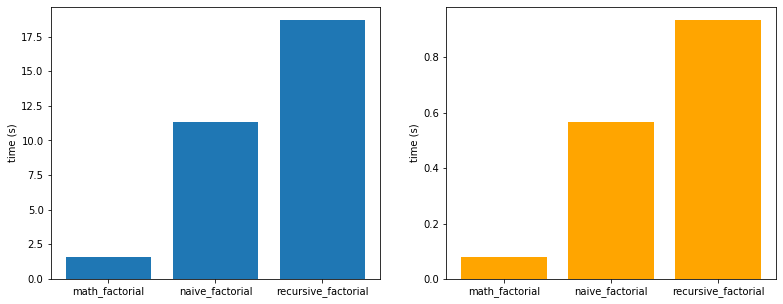

In [11]:
def truncate_data_from_key_func_name(name):
    """
    Helper method to remove the 'data_' prefix
    from the keys of time_data function names.
    """
    return name[name.find('_')+1:]

def visual_avg_comparision(time_data: typing.Dict[str, typing.Any]) -> None:

    avg_points = sorted(list(map(lambda item: item['avg_time'], time_data.values())))
    func_names = sorted(list(map(truncate_data_from_key_func_name, time_data.keys())), 
                        key=lambda item: time_data[f'data_{item}']['time_taken'])
    max_points = sorted(list(map(lambda item: item['time_taken'], time_data.values())))

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
    axes[0].bar(func_names, max_points)
    axes[0].set_ylabel('time (s)')

    axes[1].bar(func_names, avg_points, color='orange')
    axes[1].set_ylabel('time (s)')

visual_avg_comparision(time_data)

## The `math.factorial` Implementation

Clearly, the `math.factorial` version outperforms the other two functions. Now you might argue that because it's been implemented natively in C, one of the best performing languages out there, it will definitely be better than Python, quite a slow language in general. But this function has also been implemented differently using a different algorithm. So let's learn about it.

Time to clone the CPython reposiotry.

To see why the `math.factorial` function performs so well, we need to dig into the source code. This notebook was powered by a Jupyter Kernel running CPython 3.7.6. So let's look at the native factorial function in C that can be found in `./Modules/mathmodule.c` - 

```c
static PyObject *
math_factorial(PyObject *module, PyObject *arg)
{
    PyObject *result, *odd_part, *two_valuation;
    long x = PyLong_AsLongAndOverflow(arg, &overflow);

    ...
    
    /* use lookup table if x is small */
    if (x < (long)Py_ARRAY_LENGTH(SmallFactorials))
        return PyLong_FromUnsignedLong(SmallFactorials[x]);

    /* else express in the form odd_part * 2**two_valuation, and compute as
       odd_part << two_valuation. */
    odd_part = factorial_odd_part(x);
    if (odd_part == NULL)
        return NULL;
    two_valuation = PyLong_FromLong(x - count_set_bits(x));
    if (two_valuation == NULL) {
        Py_DECREF(odd_part);
        return NULL;
    }
    result = PyNumber_Lshift(odd_part, two_valuation);
    Py_DECREF(two_valuation);
    Py_DECREF(odd_part);
    return result;
}
```

This is a fairly basic implementation of a divide and conquer algorithm for a factorial function. It is, as we'll see soon, aptly titled "Binary Split Factorial Formula". It can be traced back to [this webpage](http://www.luschny.de/math/factorial/binarysplitfact.html). The mathematical formula is given below - 

$$ \displaystyle n! = 2^{n-\sigma_{2}(n)} \prod_{k \geqslant 1} {\left(\prod_{n2^{-k}\ <\  j\ \leqslant\ n2^{-k+1}} j^{\text{[j odd]}} \right)}^{k} $$
<br />
$$\sigma_{2}(n) = \text{number of 1's in binary expansion of n} \\
j^{[j\ odd]} = j \text{ if } j \text{ is odd; otherwise } 1$$

Now, this might look a little complicated but the underlying theory really is not. Let's break it down a little. 

The $\sigma_{2}(n)$ function is just a method that counts the number of times 1 appears in the base 2 form (binary expansion) of a number $n$. For example, the number $6$ will be written in binary as $110$. We can easily count that the digit $1$ appears $2$ times, therefore, $\sigma_{2}(6) = 2$.

Since our goal is to understand this fast factorial method, we shall try to write our own version of this method. But since this function depends on other functions, we will write them separately. Let's start with the $\sigma_{2}(n)$ function. It's a very Python specific implementation but on some tests conducted, it was the fastest one as compared to others.

In [12]:
def count_set_bits(n: int) -> int:
    """
    Converts n to it's binary representation
    with bin() and returns the count of 1 in
    the string after the prefix of '0b' by bin().
    """
    return bin(n)[2:].count('1')

That's it for the $\sigma_{2}$ function, perhaps the easiest bit (no pun intended) for the algorithm. Now comes the second part, the _odd part_ of the function. This is the inner part of the $\prod$ of the algorithm. It works by multiplying all the odd numbers between two numbers. It is assumed that the two arguments will be valid, i.e., they will both be odd numbers. Below is a simple, iterative implementation - 

In [ ]:
def odd_number_product(i: int, j: int) -> int:
    total = 1
    for num in range(i, j, 2):
        total *= num
    return total

Now comes the outer $\prod$ part of the algorithm - it returns the product of the odd_number_product starting from $1$ to $n$, halving it with each iteration. For example, to compute this _odd part_ of $20!$, we need to compute the following - 

$$\displaystyle oddPart = (3) \times (3 \cdot 5 \cdot 7) \times (3 \cdot 5 \cdot 7 \cdot 9 \cdot ) \times (3 \cdot 5 \cdot 7 \cdot 9 \cdot 11 \cdot 13 \cdot 15 \cdot 17 \cdot 19) $$